# **Shuja Bin Amjad**
Contact: +92 3558458884


email: shujaamjad321@gmail.com

# **Suicide Rate Prediction with Machine Learning**

 Suicide is a serious public health problem. The World Health Organization (WHO) estimates that every year close to 800 000 people take their own life, which is one person every 40 seconds and there are many more people who attempt suicide. Suicide occurs throughout the lifespan and was the second leading cause of death among 15-29-year-olds globally in 2016.
 
 The objective of this notebook is to predict the suicide rates using Machine Learning algorithms and analyzing them to find correlated factors causing increase in suicide rates globally.

In [4]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

### Loading the Data

In [5]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
# Shape of dataframe
df.shape

(27820, 12)

In [7]:
# listing the features of the dataset
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
#Renaming the columns names for convinience

df.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 
                'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
df.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [9]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [10]:
df.describe()

,year,suicide_count,population,suicide_rate,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [11]:
df.isnull().sum()*100/len(df)

country            0.000000
year               0.000000
gender             0.000000
age_group          0.000000
suicide_count      0.000000
population         0.000000
suicide_rate       0.000000
country-year       0.000000
HDI for year      69.935298
gdp_for_year       0.000000
gdp_per_capita     0.000000
generation         0.000000
dtype: float64

In [12]:
df["age_group"].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

In [13]:
df['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

### Let's see how many coutries are available in the dataset

In [14]:
print(len(df['country'].unique()))
df['country'].unique()

101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

# **Visualising the Data**

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'suicide_count'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'suicide_rate'}>],
       [<AxesSubplot: title={'center': 'HDI for year'}>,
        <AxesSubplot: title={'center': 'gdp_per_capita'}>]], dtype=object)

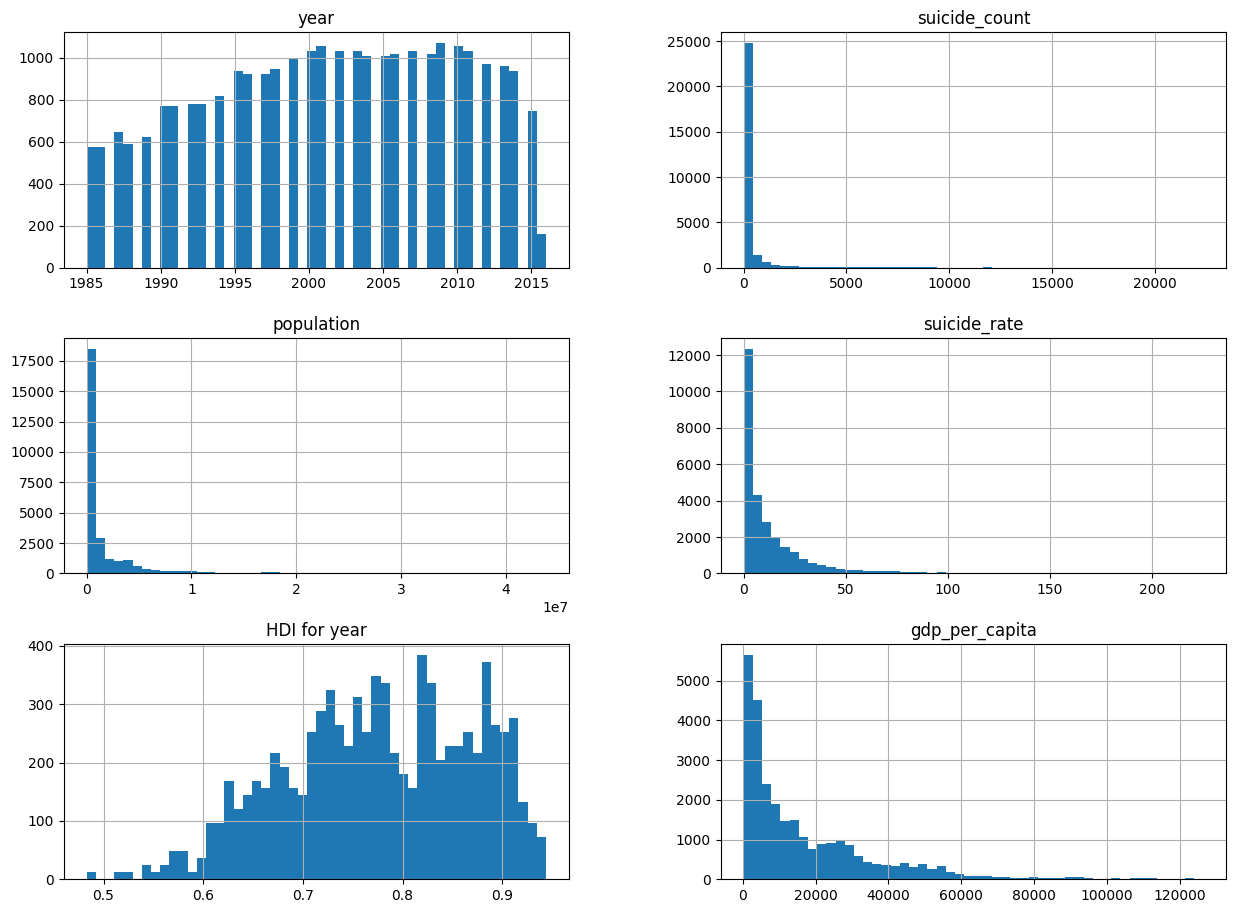

In [15]:
df.hist(bins = 50, figsize = (15,11))

C:\Users\standard\AppData\Local\Temp\ipykernel_7156\204667272.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'Oranges')


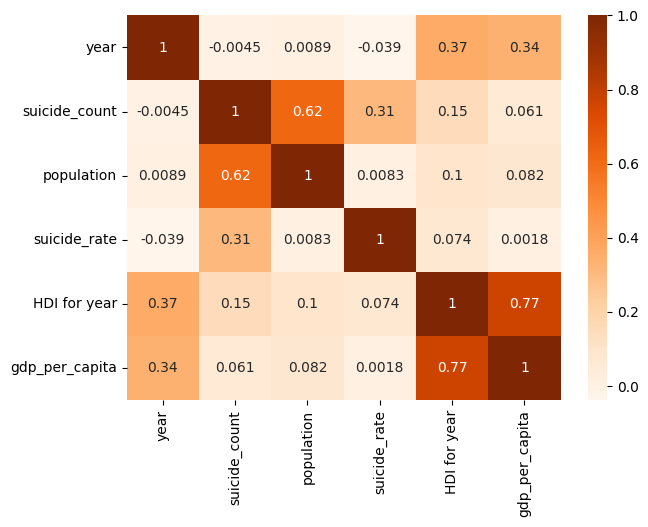

In [16]:
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(), annot = True, cmap = 'Oranges')
plt.show()

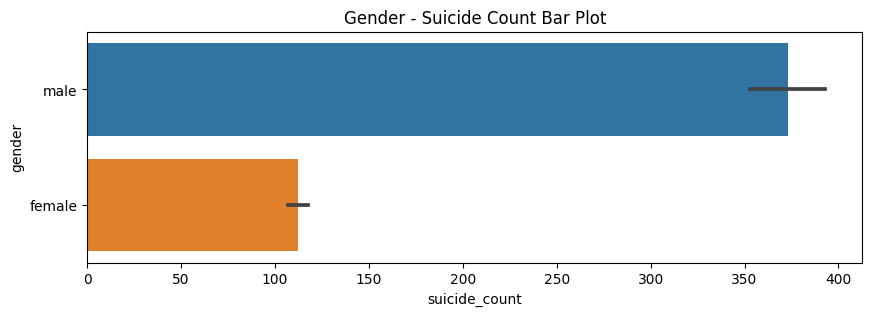

In [17]:
plt.figure(figsize=(10, 3))
sns.barplot(y=df.gender, x=df.suicide_count)
plt.title('Gender - Suicide Count Bar Plot')
plt.show()


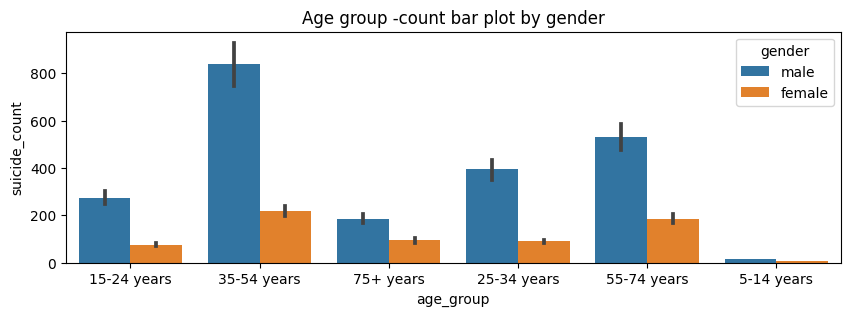

In [18]:
plt.figure(figsize=(10,3))
sns.barplot(x = 'age_group',y = 'suicide_count', hue = 'gender', data = df)
plt.title("Age group -count bar plot by gender")
plt.show()

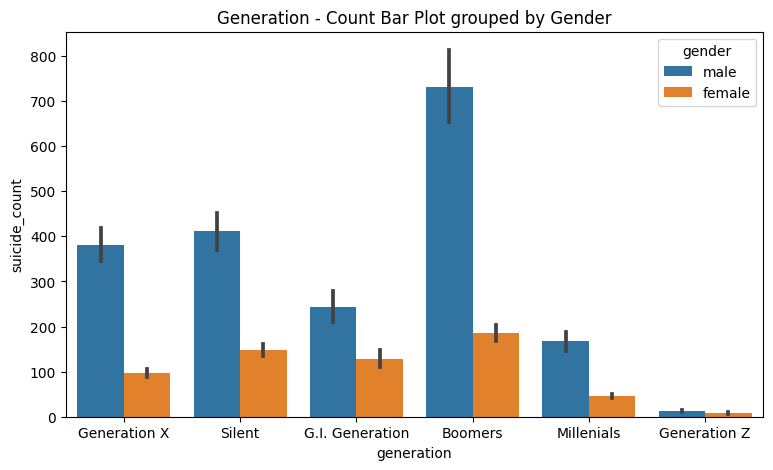

In [19]:
plt.figure(figsize = (9,5))
sns.barplot(x="generation",y = "suicide_count", hue = "gender", data = df)
plt.title("Generation - Count Bar Plot grouped by Gender")
plt.show()

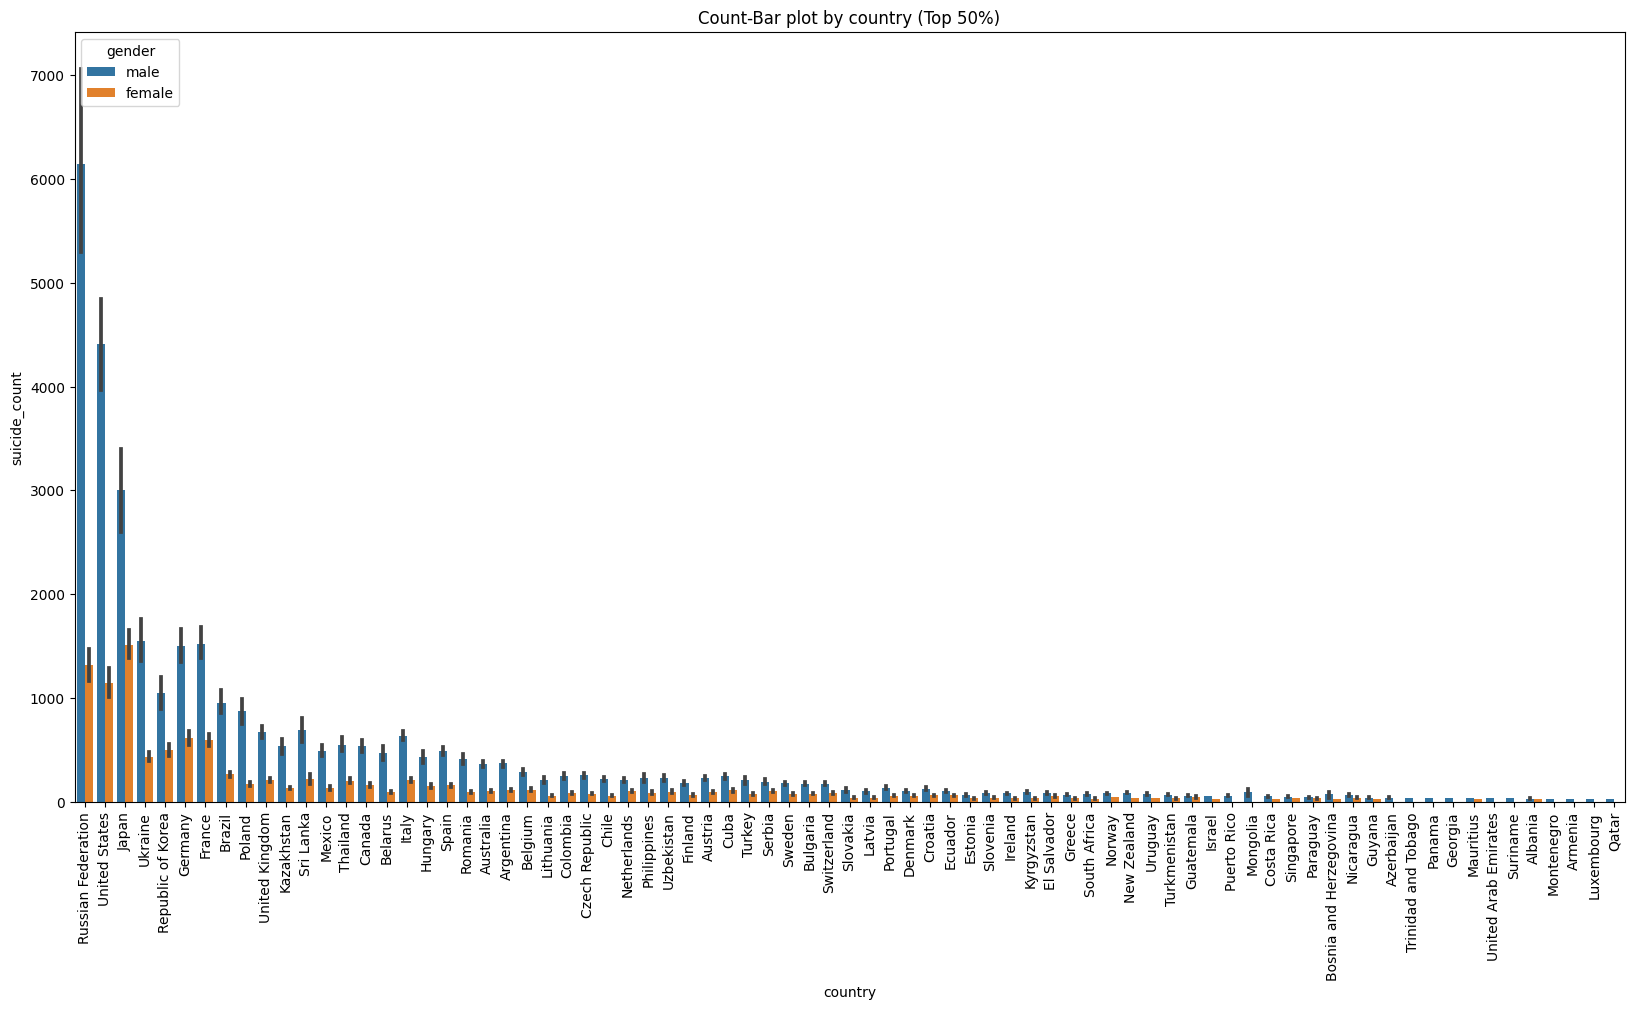

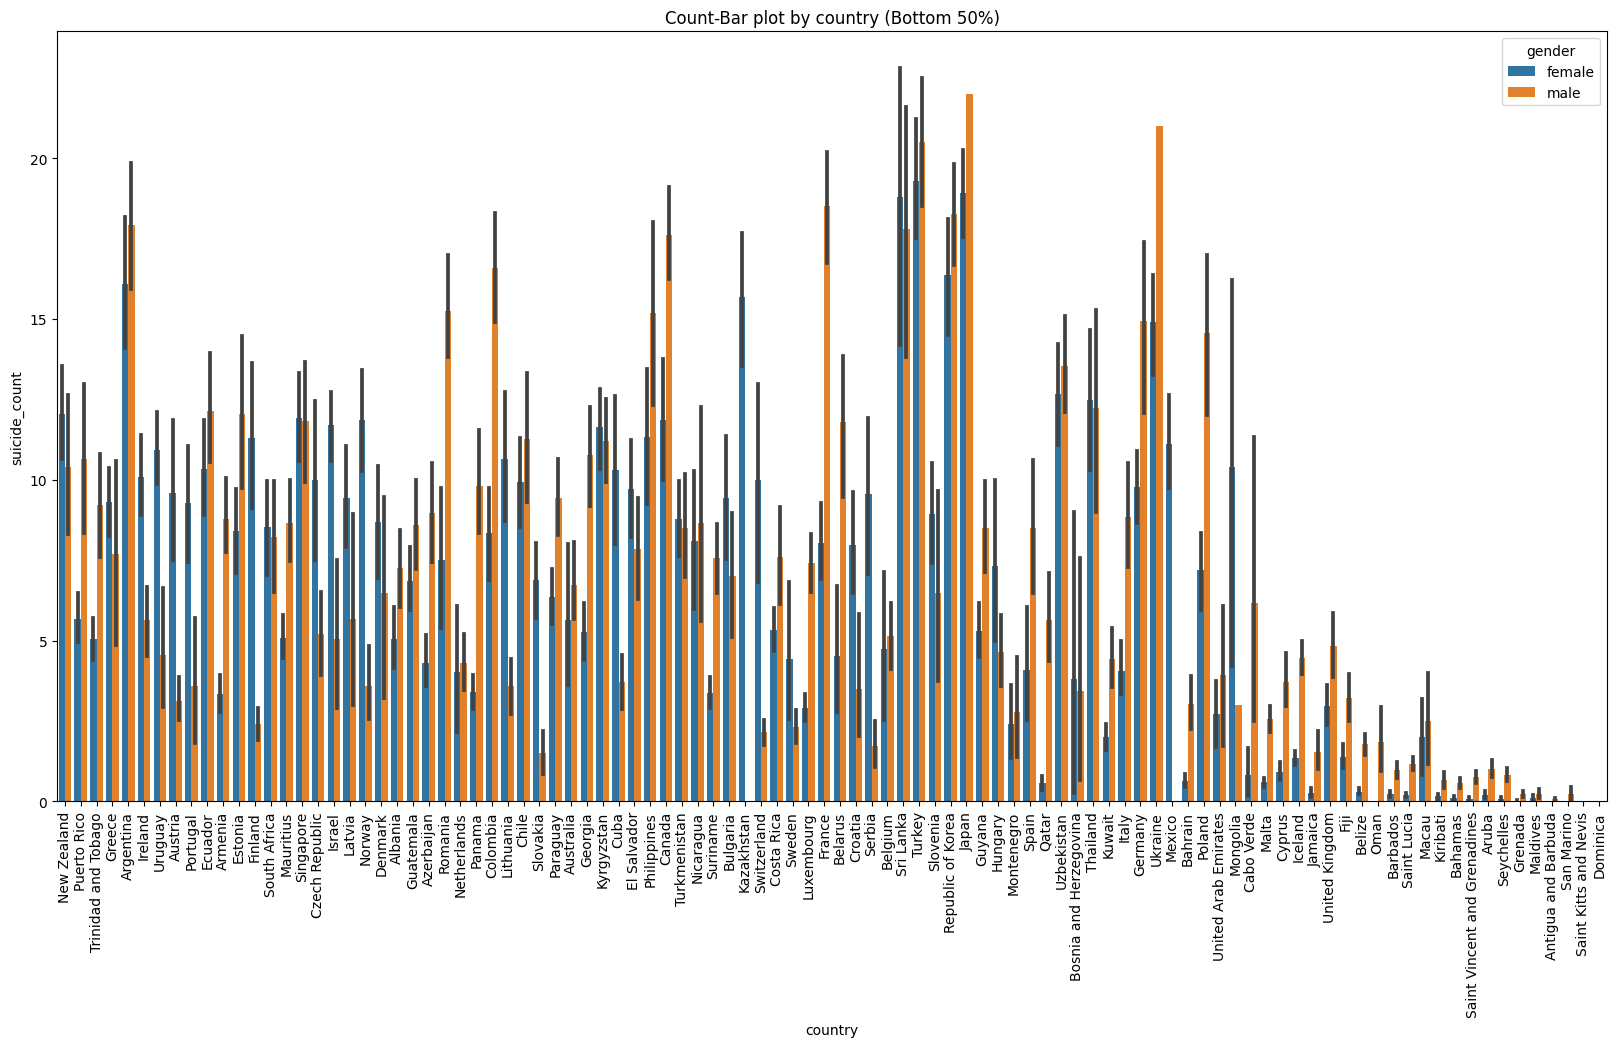

In [20]:
df_sorted = df.sort_values(by="suicide_count", ascending=False)

# Calculate the number of rows that represent 50 percent of the data
half_rows = len(df_sorted) // 2

# Select the top 50 percent of the rows
df_top_50_percent = df_sorted.head(half_rows)

# Select the bottom 50 percent of the rows
df_bottom_50_percent = df_sorted.tail(half_rows)

# Create the bar plot for the top 50 percent of countries
plt.figure(figsize=(20, 10))
sns.barplot(x="country", y="suicide_count", hue="gender", data=df_top_50_percent)
plt.title('Count-Bar plot by country (Top 50%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Create the bar plot for the bottom 50 percent of countries
plt.figure(figsize=(20, 10))
sns.barplot(x="country", y="suicide_count", hue="gender", data=df_bottom_50_percent)
plt.title('Count-Bar plot by country (Bottom 50%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

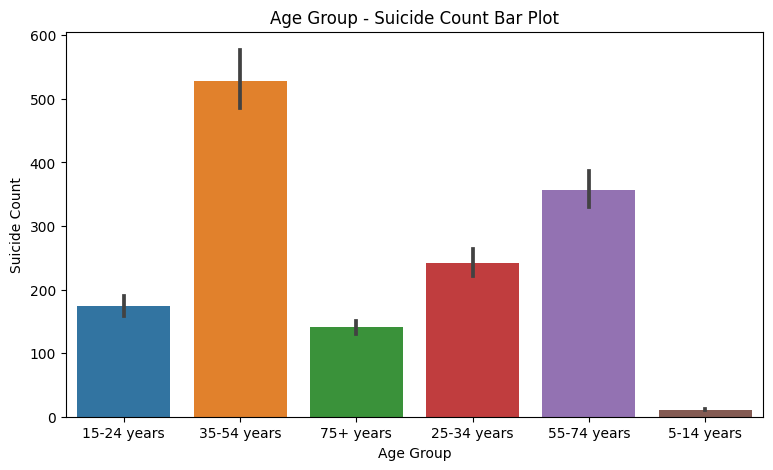

In [21]:
plt.figure(figsize=(9,5))
sns.barplot(x = df["age_group"], y = df['suicide_count'])
plt.xlabel('Age Group')
plt.ylabel('Suicide Count')
plt.title("Age Group - Suicide Count Bar Plot")
plt.show()

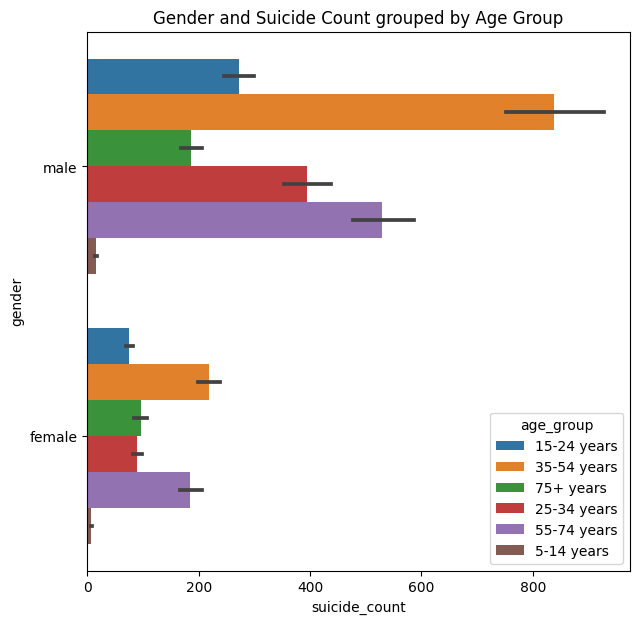

In [22]:
plt.figure(figsize = (7,7))
sns.barplot(x = df["suicide_count"], y = df['gender'], hue="age_group", data = df)
plt.title("Gender and Suicide Count grouped by Age Group")
plt.show()

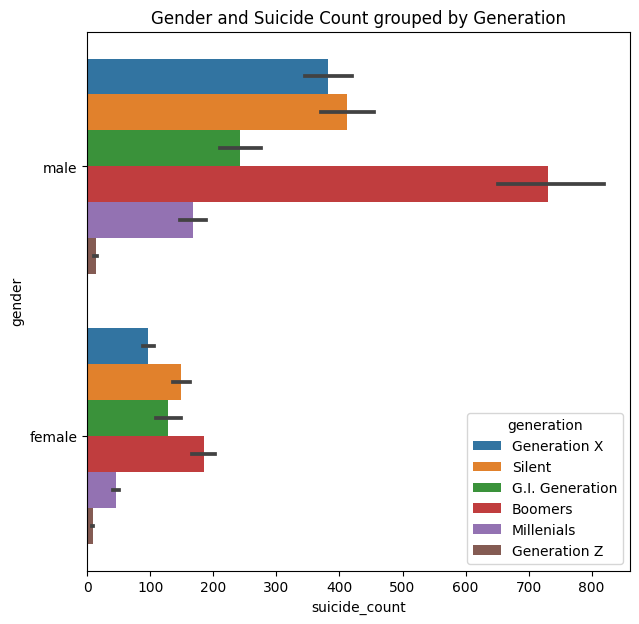

In [23]:
plt.figure(figsize = (7,7))
sns.barplot(y = 'gender', x = 'suicide_count', hue = "generation", data = df)
plt.title("Gender and Suicide Count grouped by Generation")
plt.show()

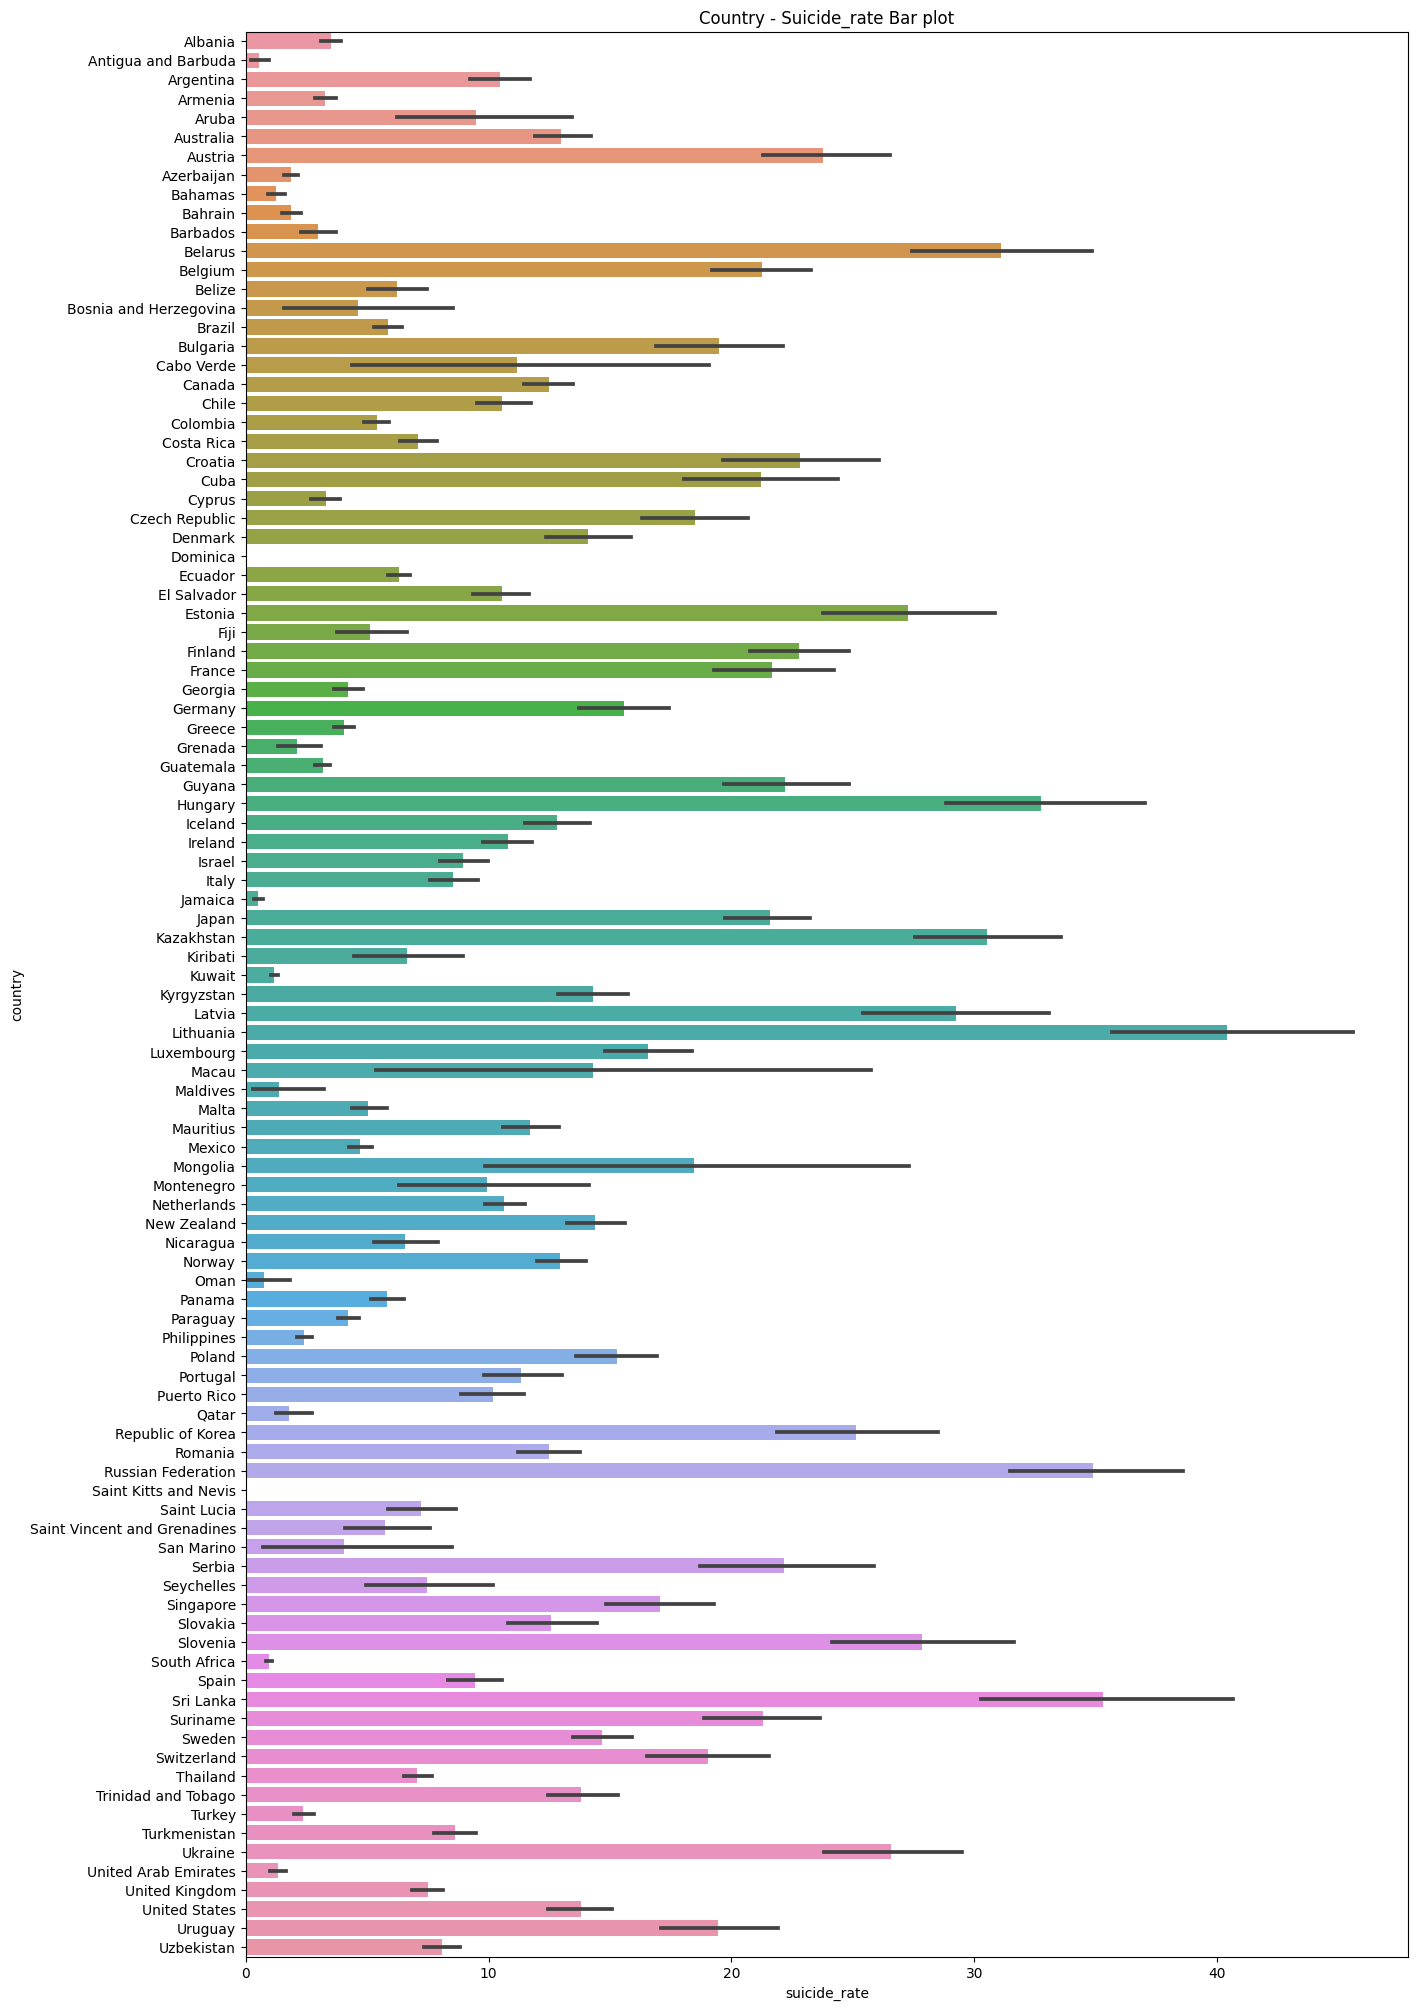

In [24]:
plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = df)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

<AxesSubplot: xlabel='year'>

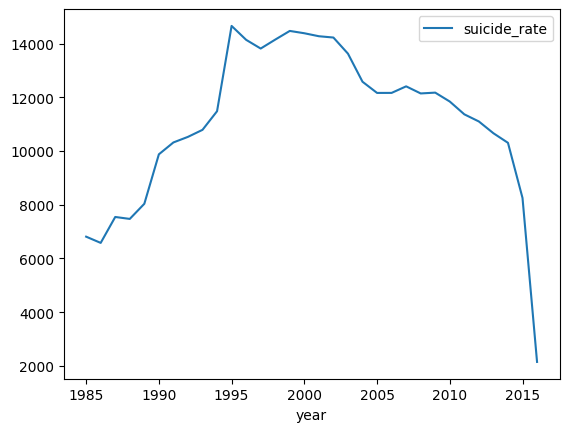

In [25]:
df[['year', 'suicide_rate']].groupby(['year']).sum().plot()

<Figure size 2000x1000 with 0 Axes>

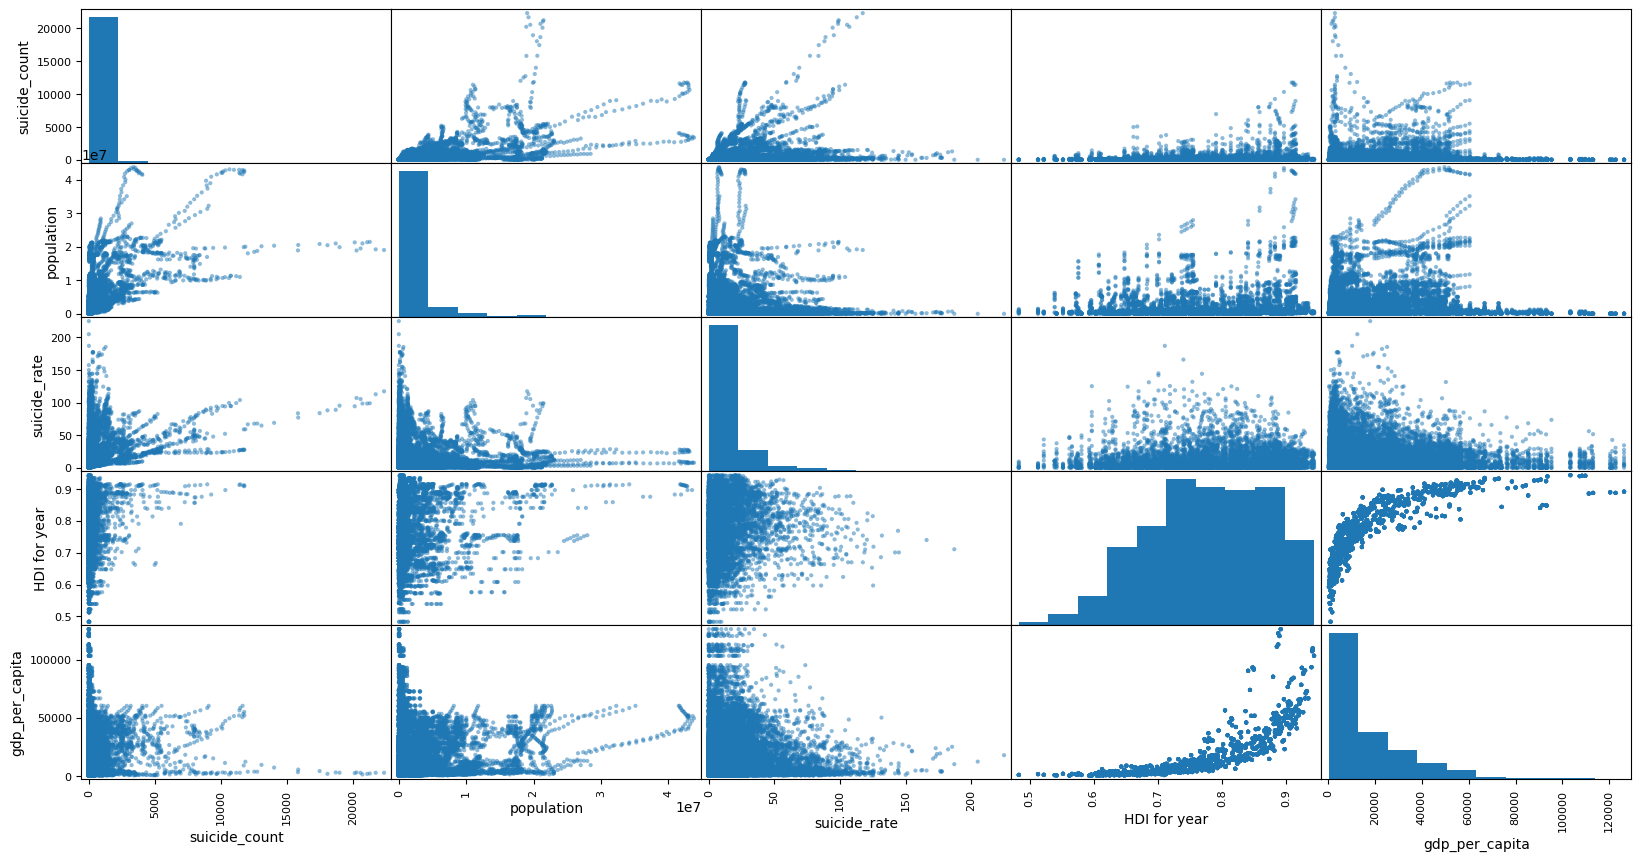

In [26]:

plt.figure(figsize=(20,10))
attributes = ['suicide_count', 'population', 'suicide_rate','HDI for year', 
              'gdp_for_year','gdp_per_capita']
scatter_matrix(df[attributes], figsize=(20,10))
plt.show()

# **Data Preprocessing and EDA**

In [27]:
df.describe()

,year,suicide_count,population,suicide_rate,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [28]:
df.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [29]:
df = df.drop(["HDI for year"], axis = 1)
df.shape

(27820, 11)

In [30]:
df.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [31]:
df = df.drop(['country-year'], axis = 1)
df.shape

(27820, 10)

In [32]:
df.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
categorical = ["country", "year", "age_group", "gender", "generation"]
le = LabelEncoder()
for column in categorical:
    df[column] = le.fit_transform(df[column])

In [34]:
stat_df = df.copy()
stat_df

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [35]:
df.dtypes

country             int32
year                int64
gender              int32
age_group           int32
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int32
dtype: object

In [36]:
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",", "").astype(float)

In [37]:
numerical = ["suicide_count", "population", "suicide_rate", "gdp_for_year", "gdp_per_capita"]
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
df[numerical] = rc.fit_transform(df[numerical])

In [38]:
df

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,2
1,0,2,1,2,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,5
2,0,2,0,0,-0.085938,-0.101142,-0.073885,-0.182942,-0.400243,2
3,0,2,1,5,-0.187500,-0.294064,-0.089172,-0.182942,-0.400243,1
4,0,2,1,1,-0.125000,-0.112232,-0.172611,-0.182942,-0.400243,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.640625,2.297696,-0.192994,0.059520,-0.329631,2
27816,100,29,0,5,-0.125000,-0.058824,-0.217197,0.059520,-0.329631,5
27817,100,29,1,3,0.273438,1.679341,-0.243312,0.059520,-0.329631,3
27818,100,29,0,3,0.148438,1.585323,-0.275159,0.059520,-0.329631,3


### Splitting the Data

In [39]:
y = df['suicide_rate']
X = df.drop('suicide_rate',axis=1)
X.shape, y.shape

((27820, 9), (27820,))

### Model Building and Training

In [40]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

In [41]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [42]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

### K-Nearest Neighbours

In [43]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [44]:
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 1, 'weights': 'uniform'}


In [45]:
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

### Performance Evaluation

In [46]:
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.812

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.5358202421806745


In [47]:
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn,  rmse_train_knn, rmse_test_knn)

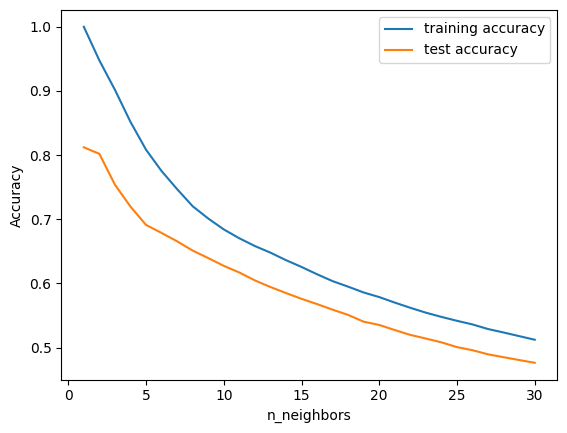

In [48]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()